# Project: Investigate TMDB dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Data Set
I like movies and usually surf IMDB for movies rating and information so I will choose the TMDB movie data. TMDB movie data set is a data set contains information of about 10.000 movies - which is cleaned from oridinal data on Kaggle. It includes user rating, budget, revenue, casts and genres of the movies from 1960 to 2015.

#### Questions I try to investigate
- Q0: Evolution of number of movies release each year? 
- Q1: What is the correlation between: budget, revenue, voting and popularity?
- Q2: Evolution of run time and voting over the years?
- Q3: Who is the most profitable actor/actress for the movies they casted?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
- Data is downloaded from the pdf file. It is a cvs file named: 'tmdb-movies.cvs'
- using pd.read_cvs to read the data file.
- Print out some information: shape, info, head to get to know the data.
- check data for duplicate or missing values

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('tmdb-movies.csv')
print(data.shape)
print(list(data.columns.values))
data.info()

(10866, 21)
['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres       

In [3]:
# print out 5 1st rows of the data
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# print out the overview of the data
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# check for duplicates
sum(data.duplicated())

1

In [6]:
# identify amount of null-values in each column
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 
- Drop the duplicate
- Drop the irrelevant columns which I will not use to answer the questions
- Remove rows with null values
- Check the dataset after cleaning

In [7]:
# drop the duplicate
data.drop_duplicates(inplace=True)

In [8]:
# dropping irrelevant columns 
data.drop(['imdb_id', 'budget', 'revenue', 'director', 'genres', 'production_companies', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

In [9]:
# removing rows with null
data.dropna(inplace=True)
data.isnull().sum()
# check cleaned dataset
print(data.shape)
print(list(data.columns.values))

(10789, 10)
['id', 'popularity', 'original_title', 'cast', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 0: Evolution of number of movies release each year? Single variable exploration

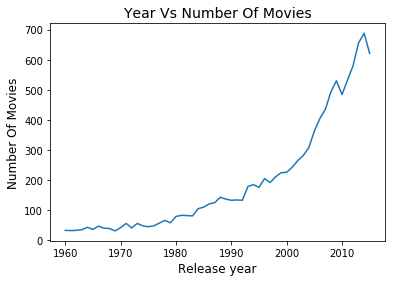

In [10]:
#Count number of film release each year
q0_df = data.groupby('release_year').count()['id']
q0_df.plot()
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Number Of Movies',fontsize = 12);

#### Answer Question 0:

From the graph, mumber of movies increase significantly over the year. Especially after year 1995, mainly due to available technology. There is a drop in year 2009, that is linked with the economic crisis. I'm not sure about the drop in 2015, coulbe ongoing collect data for the dataset.

### Research Question 1: What is the correlation between: budget, revenue, voting and popularity?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


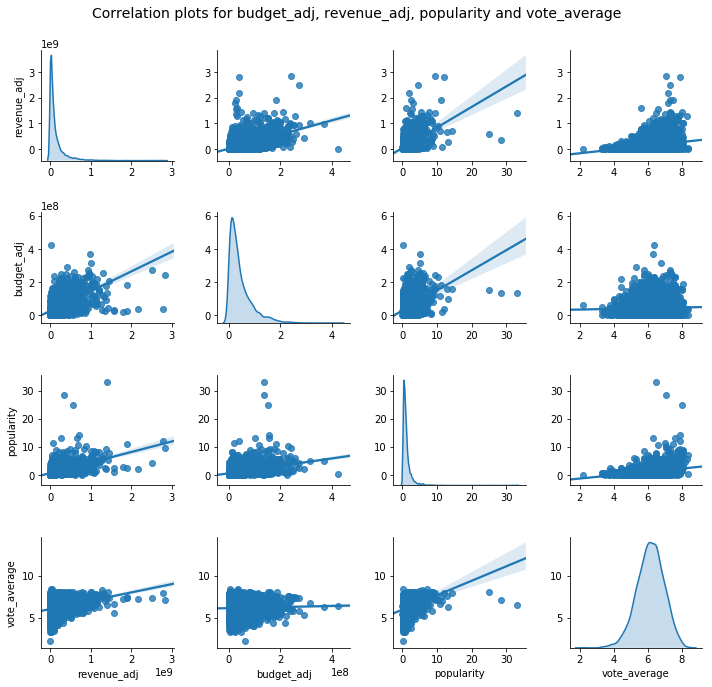

In [11]:
# Correlation plot for budget_adj, revenue_adj, popularity and vote_average
q1_df = data[['revenue_adj', 'budget_adj', 'popularity', 'vote_average']]
# Clean the zeros budgets and revenue 
q1_df['budget_adj'] = q1_df['budget_adj'].replace(0, np.nan)
q1_df['revenue_adj'] = q1_df['revenue_adj'].replace(0, np.nan)
q1_df.dropna(inplace=True)

f1 = sns.pairplot(q1_df, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
f1.fig.suptitle('Correlation plots for budget_adj, revenue_adj, popularity and vote_average',fontsize = 14)
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

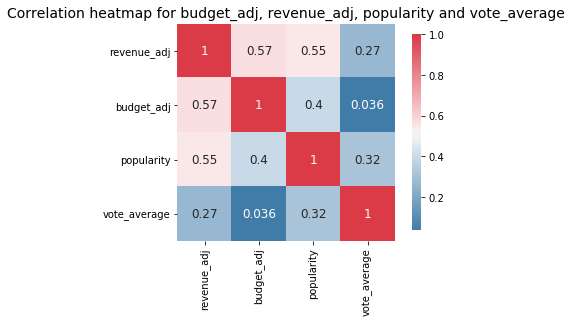

In [12]:
# Correlation heatmap
corr = q1_df.corr()
f2 , ax = plt.subplots( )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
f2 = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' :12})
plt.title('Correlation heatmap for budget_adj, revenue_adj, popularity and vote_average',fontsize = 14);

#### Answer for question 1:
Look at the plots and the heatmap, there is strong correlation between budget_adj, revenue_adj and popularity. The correlation between vote_average and other 3 aspects is quite weak. 

### Research Question 2: Evolution of run time and voting over the years? 

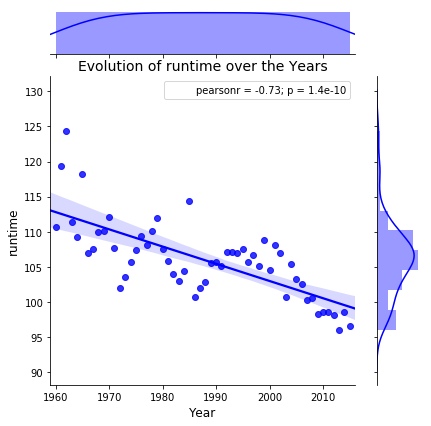

In [13]:
# Create a subset with averages grouped by year
q2_df = data.groupby('release_year', as_index=False)['runtime','vote_average'].mean()
# Function draw evolution to draw the trend over year
def draw_evolution(aspect, data):
    f = sns.jointplot(x='release_year', y=aspect, data=data, space=0.5, kind='reg', xlim=(1959, 2016), color='b')
    plt.title('Evolution of '+aspect+ ' over the Years', fontdict={'fontsize': 14})
    plt.xlabel('Year', fontdict={'fontsize': 12})
    plt.ylabel(aspect, fontdict={'fontsize': 12});
# draw evolution of runtime average over years
draw_evolution('runtime',q2_df)

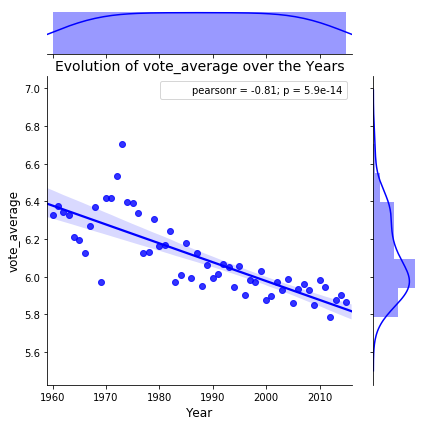

In [14]:
# draw evolution of vote average over years
draw_evolution('vote_average',q2_df)

#### Answer for Question 2:
The trend of runtime and vote_average is decrease by years from 1960 to 2015. However, this data has already take the mean of runtime and vote_average of each year, therefore the variance of those variable in each year has been removed.

### Research Question 3: Who is the most profitable actor/actress for the movies they casted?
- Here we sorted the actor by profit per movies they casted. And we only chose the actor/actress with more than 20 movies.

In [15]:
# Split the dataframe by actor
actor = data['cast'].str.split('|').apply(pd.Series).stack()
actor.index = actor.index.droplevel(-1)
actor.name = 'actor'
q3_df = data.copy()
q3_df = q3_df.join(actor)
q3_df['count'] = q3_df.groupby('actor')['actor'].transform('count')
q3_df.head()

,id,popularity,original_title,cast,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,actor,count
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,10
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard,7
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan,6
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio,24
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson,5


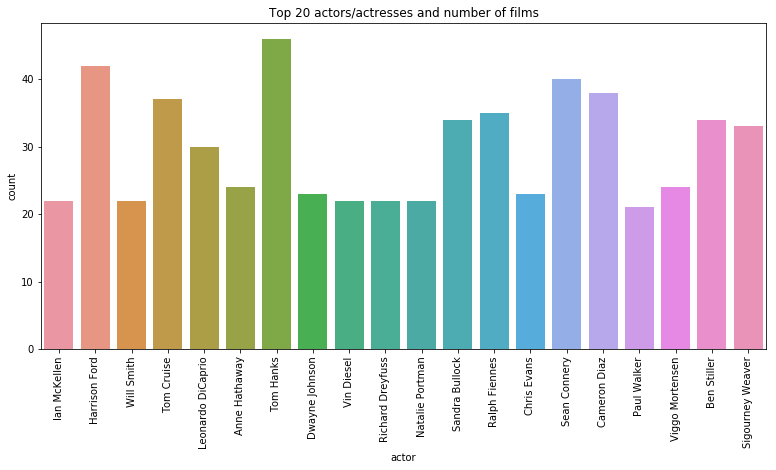

In [16]:
# Clean the zeros budgets and revenue 
q3_df['budget_adj'] = q3_df['budget_adj'].replace(0, np.nan)
q3_df['revenue_adj'] = q3_df['revenue_adj'].replace(0, np.nan)
q3_df.dropna(inplace=True)
# Calculate the profit
q3_df['profit'] = (q3_df['revenue_adj']-q3_df['budget_adj'])/q3_df['count']
# Only take the actor join more than 20 films
q3_df = q3_df[q3_df['count'] > 20]
# Create data of 20 actor have the best return for films they casted
actor_top20 = q3_df.groupby(['count','actor'])['profit'].sum()
df_actor_top20 = actor_top20.to_frame('profit').reset_index().sort_values(['profit'], ascending=[False])
df_actor_top20.iloc[:20]
plt.figure(figsize=(13,6))
f5 = sns.barplot(x='actor', y='count', data=df_actor_top20.iloc[:20])
plt.xticks(rotation=90)
f5.set_title('Top 20 actors/actresses and number of films');

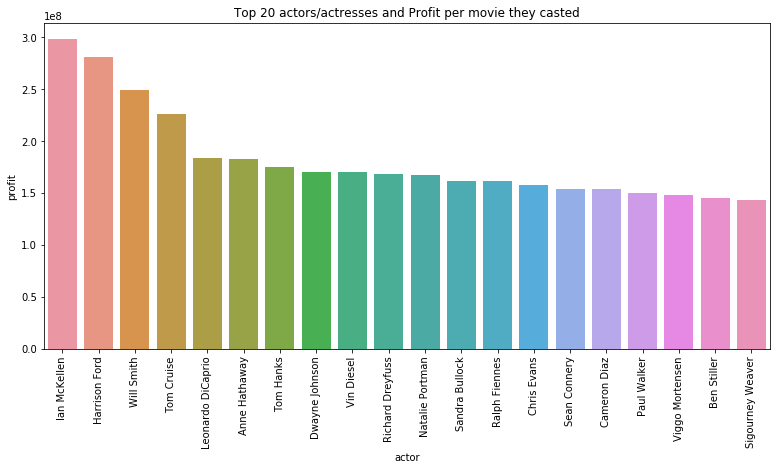

In [17]:
plt.figure(figsize=(13,6))
f6 = sns.barplot(x='actor', y='profit', data=df_actor_top20.iloc[:20])
plt.xticks(rotation=90)
f6.set_title('Top 20 actors/actresses and Profit per movie they casted');

#### Answer for Question 3: See the list of actors above

Look at the list, we can see all big names in the industry. They all have casted in the big movies with huge profit. However, we only count the times appear in cast, and don't have full contribution of them in the movies, like: is he or she main character, or only appear as a cameo? I think if cast order is the order of contribution in the movies, then we can categorize as main/supporting actors, however, it is not the case for this data set.

<a id='conclusions'></a>
## Conclusions

- This data set is really good vor studying investigation of a dataset since we have multiple aspects, some are linked together. 

- There is some limitations from the dataset: I found out that some of the data is not correct: if you see the most lost movies in term of profit: you have Warrior's Way, but the budget of this movies is somewhat 40 Mils Dollars, not 400 Mils Dollars. May be it is typos. Moreover, if you look at the cast names, there are a lot of strange character, however, the instruction said we don't need to clean it and I also don't have this strange name character in my analysis result.

- Some limitations from my analysis: I tried to keep the dataset as it is, only clean the blank values in the columns that I care the most, so the cleaning step only clean out about 100 data. For each questions, I create a separated dataframe to analysis: q0_df, q1_df ... that could make thing more complicated but it leave the data set untouched, and have dedicated dataset to answer each question. However, there are still limitation from each analysis I made for questions, which stated below:

- Q0: Evolution of number movies over the year: no doubt about that it is increasing, we can see some drop in the time and could link with what happended that year: 2008 economic crisis effect the number of movies released in 2009 for expample.

- Q1: Correlation of the 4 aspects: voting, popularity, budget, and revenue: limitation here is I take all the data for the analysis, maybe it will be more clear if we can only select movies with certain lower limit of profit, budget, popularity.

- Q2: Evolution of the runtime and vote_average over the year: for less messy data, I take the mean of each aspect per year, however, it also remove the variance of that variable in that year.

- Q3: In the beginning I tried to find out who is the actor can guarantee the profit for the movies he/she joined. Therefore, I broke down it to, who have casted in more than 20 films, and have the most profit per film. Howver, the dataset has 5 actors per cast and we don't know who is the main contributor in the film, that is also very subjective to categorize, and sometimes film has 1 main actor and some film has more than 10 main actors. Moreover, I choose the limit of 20 films, so, the actors has less than 20 film but has huge profit per film already be removed in the list. 

## Submitting your Project 


In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0